# STK4900 Obligatory Assignment 2
## Bruce Chappell

For this assignment I will be using a Jupyter environment run on an R kernel. This will allow for easy plotting and manipulation. First I will import the data from the class website and take a quick look at its features

In [5]:
crabs = read.table("https://www.uio.no/studier/emner/matnat/math/STK4900/data/crabs.txt",header=TRUE)
summary(crabs)

       y              width          weight          color      
 Min.   :0.0000   Min.   :21.0   Min.   :1.200   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:24.9   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.0000   Median :26.1   Median :2.350   Median :2.000  
 Mean   :0.6416   Mean   :26.3   Mean   :2.437   Mean   :2.439  
 3rd Qu.:1.0000   3rd Qu.:27.7   3rd Qu.:2.850   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :33.5   Max.   :5.200   Max.   :4.000  
     spine      
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.486  
 3rd Qu.:3.000  
 Max.   :3.000  

#### Question 1
##### Part A
Our output variable y for the crab data set is a binary result with $y=1$ if satellites are present during mating and $y=0$ if they are not present. Since the we are trying to create a model that gives us the probability of satellites being present based on other quantitative and categorical variables, we should create a logistic regression model. A logistic regression model will give us the probability of a binary outcome for each instance. The formula for this model is given by

$$p(y=1|x_1, ..., x_p) = \frac{exp(\beta_0 + \beta_1x_1 + ... \beta_px_p)}{1 + exp(\beta_0 + \beta_1x_1 + ... \beta_px_p)}$$

##### Part B
To find the Odds Ratio of the presence of satellites between crabs that differ one cm in width, we first define the odds as

$$ODDS=\frac{p(x)}{1-p(x)} = exp(\beta_0 + \beta_1x)$$

for a model with only one covariate. In our case this covariate is width. Then the odds ratio for a difference of one unit of the covariate is defined as

$$OR = \frac{p(x+1)/[1-p(x+1)]}{p(x)/[1-p(x)]} = \frac{exp(\beta_0 + \beta_1(x+1))}{exp(\beta_0 + \beta_1x)} = exp(\beta_1)$$

To find the Odds Ratio we perform a logistic regression fit of the probability of a female crab having satelite crabs based just on width.

In [7]:
crabs.width = glm(y~width,data=crabs,family = binomial)
summary(crabs.width)


Call:
glm(formula = y ~ width, family = binomial, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0281  -1.0458   0.5480   0.9066   1.6942  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.3508     2.6287  -4.698 2.62e-06 ***
width         0.4972     0.1017   4.887 1.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 194.45  on 171  degrees of freedom
AIC: 198.45

Number of Fisher Scoring iterations: 4


From this we see that $\beta_1 = 0.4972$ and $OR = exp(0.4972) = 1.64$. This means that the odds of a female crab having a satellite increase by 64% for each unit increase of the variable width, which in our case is 1 cm. Another quantity we can define is the relative risk:

$$RR = \frac{p(1)}{p(0)}$$

we see this is nearly equivalent to the Odds Ratio if $p(x+1)$ and $p(x)$ are nearly zero. In our example the relative risk is given by

$$RR = \frac{exp(beta_0 + beta_1)}{exp(beta_0} = \frac{7.11 \times 10^{-6}}{4.33 \times 10^{-6}} = 1.644$$

We can the find a condifdence interval for the Odds Ratio by using the following function from the lecture notes which transforms the confidence interval for $\beta_1$.

In [8]:
# function from lecture 7
expcoef=function(glmobj)
{
regtab=summary(glmobj)$coef
expcoef=exp(regtab[,1])
lower=expcoef*exp(-1.96*regtab[,2])
upper=expcoef*exp(1.96*regtab[,2])
cbind(expcoef,lower,upper)
}

expcoef(crabs.width)

,expcoef,lower,upper
(Intercept),4.326214e-06,2.503215e-08,0.0007476835
width,1.644162e+00,1.346931e+00,2.0069822897


The resulting confidence interval is thus

$$CI_{Odds Ratio} = (1.35, 2.00)$$

To comment on whether an increase in width is statistically significant we reffer back to the table summarizing the logistic regression fit using width as the only covariate. Here we see a small P-value of $1.02 \times 10^{-6}$, thus width is significant with respect to whether or not a female has satellites.
##### Part C
We will now check if the other covariates are significant with respect to the presence of satellites. The variables spine and color have 3 and 4 discrete values respectively and will thus be categorical covariates while weight has a continuous range of values and will be a numerical covariate. Below we fit the model with each covariate one at a time.

In [13]:
crabs.weight = glm(y~weight,data=crabs,family = binomial)
crabs.color = glm(y~factor(color),data=crabs,family = binomial)
crabs.spine = glm(y~factor(spine),data=crabs,family = binomial)

cat("WEIGHT\n")
summary(crabs.weight)
cat("---------------------------------------------------------\n")
cat("COLOR\n")
summary(crabs.color)
cat("---------------------------------------------------------\n")
cat("SPINE\n")
summary(crabs.spine)
cat("---------------------------------------------------------\n")

WEIGHT



Call:
glm(formula = y ~ weight, family = binomial, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1108  -1.0749   0.5426   0.9122   1.6285  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.6947     0.8802  -4.198 2.70e-05 ***
weight        1.8151     0.3767   4.819 1.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 195.74  on 171  degrees of freedom
AIC: 199.74

Number of Fisher Scoring iterations: 4


---------------------------------------------------------
COLOR



Call:
glm(formula = y ~ factor(color), family = binomial, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6651  -1.3370   0.7997   0.7997   1.5134  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)      1.0986     0.6667   1.648   0.0994 .
factor(color)2  -0.1226     0.7053  -0.174   0.8620  
factor(color)3  -0.7309     0.7338  -0.996   0.3192  
factor(color)4  -1.8608     0.8087  -2.301   0.0214 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 212.06  on 169  degrees of freedom
AIC: 220.06

Number of Fisher Scoring iterations: 4


---------------------------------------------------------
SPINE



Call:
glm(formula = y ~ factor(spine), family = binomial, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5576  -1.4385   0.8400   0.9371   1.2346  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)      0.8602     0.3597   2.392   0.0168 *
factor(spine)2  -0.9937     0.6303  -1.577   0.1149  
factor(spine)3  -0.2647     0.4068  -0.651   0.5152  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 223.23  on 170  degrees of freedom
AIC: 229.23

Number of Fisher Scoring iterations: 4


---------------------------------------------------------


As with width, weight has a very low P-value score and is thus statistically significant. The P-values for each value of the spine variable are all well above 0.05 and are thus statistically insignificant. For color, only the fourth value has a P-value bellow 0.05 and that represents a "dark" crab compared with the base line "light" crab. However, this value is not nearly as low as the P-values for weight and width. In conclussion, it seems like width, weight, and whether the crab has a "dark" or "light" color are the significant covariates.
#### Part D
Now we will attempt to make a model using all the covariates.

In [15]:
crabs.all.var = glm(y~ weight + width + factor(spine) + factor(color) ,data=crabs,family = binomial)
summary(crabs.all.var)


Call:
glm(formula = y ~ weight + width + factor(spine) + factor(color), 
    family = binomial, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1977  -0.9424   0.4849   0.8491   2.1198  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -8.06501    3.92855  -2.053   0.0401 *
weight          0.82578    0.70383   1.173   0.2407  
width           0.26313    0.19530   1.347   0.1779  
factor(spine)2 -0.09598    0.70337  -0.136   0.8915  
factor(spine)3  0.40029    0.50270   0.796   0.4259  
factor(color)2 -0.10290    0.78259  -0.131   0.8954  
factor(color)3 -0.48886    0.85312  -0.573   0.5666  
factor(color)4 -1.60867    0.93553  -1.720   0.0855 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 185.20  on 165  degrees of freedom
AIC: 201.2

Number of Fisher Scoring ite

When using all of the covariates in our model, we only get P-values larger than 0.05 and thus cannot get rid of certain covariates on the grounds that they are insignificant. We can run an ANOVA on the full model to determine if any we can reject the null hypothesis of $H_0: \beta_i =0$ for any of the covariates. 

In [16]:
anova(crabs.all.var,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,172,225.7585,NA
weight,1,30.02137349,171,195.7371,4.273103e-08
width,1,2.84526274,170,192.8919,9.164361e-02
factor(spine),2,0.09412879,168,192.7978,9.540260e-01
factor(color),3,7.59575816,165,185.2020,5.514840e-02


The chart above reveals that weight is the only significant covariate with respect to satellite presence. This result contradicts what we found when fitting models using only one covariate at a time as width was also found to be significant in those models.

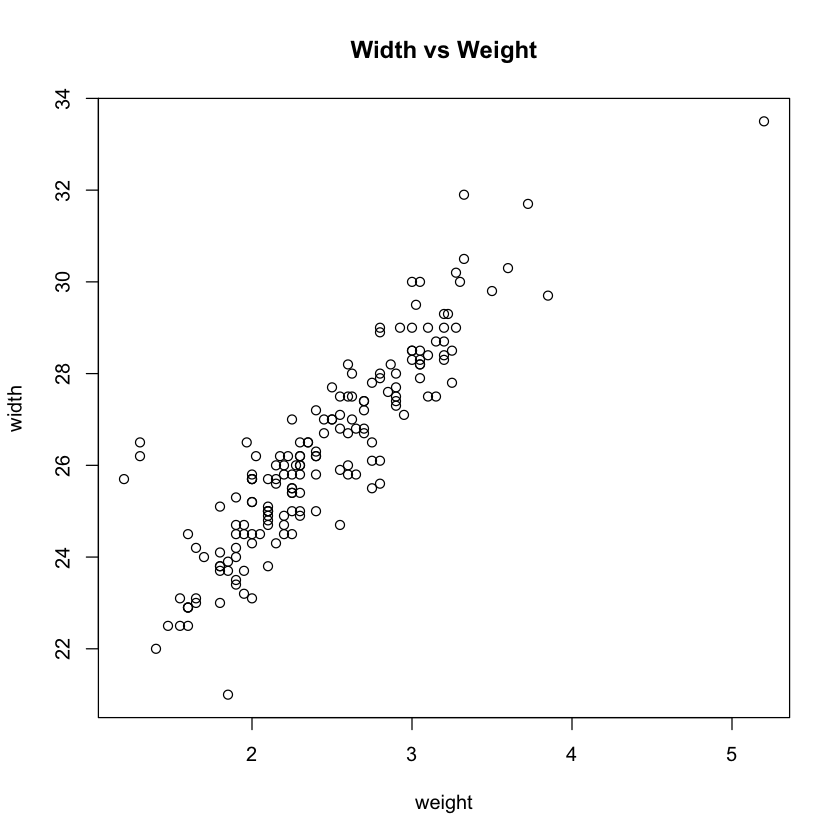

In [17]:
plot(width~weight,data=crabs, main="Width vs Weight")

The above plot shows that the two variables appear to be nearly linearly related. This explains why when considered seperately, they both appear to be significant covariates but when considered together only one of them is. Thus when trying to model satellite presence we should use either weight or width as our lone covariate as they both contribute nearly the same information.
#### Part E
To check interaction between the variables we run ANOVA on the following model:

In [18]:
crabs.int = glm(y~weight + width + width:weight + factor(spine) + factor(color) + width:factor(color) + width:factor(spine) + weight:factor(color) + weight:factor(spine) + factor(spine):factor(color), data=crabs, family = binomial)
anova(crabs.int, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,172,225.7585,NA
weight,1,30.02137349,171,195.7371,4.273103e-08
width,1,2.84526274,170,192.8919,9.164361e-02
factor(spine),2,0.09412879,168,192.7978,9.540260e-01
factor(color),3,7.59575816,165,185.2020,5.514840e-02
weight:width,1,0.81586734,164,184.3861,3.663912e-01
width:factor(color),3,6.58168180,161,177.8045,8.649624e-02
width:factor(spine),2,0.51282200,159,177.2916,7.738239e-01
weight:factor(color),3,3.95109747,156,173.3405,2.667934e-01


From the ANOVA above, we again see that the only significant covariate is weight. All combinations of covariates have P-values above 0.05 and are not significant, thus none of the covariates interact with eachother.

#### Question 2

In [21]:
olympic = read.table("http://www.uio.no/studier/emner/matnat/math/STK4900/data/olympic.txt",sep="\t",header=TRUE)


##### Part A
In this dataset, our outcome variable is a count of medals per country and we will therefore model it with a Poisson distribution $y_i\sim P_o(\lambda_i)$ where $\lambda_i$ is the rate for each $i^{th}$ country. The rate for each ocuntry is dependent on several covariates and is thus modelled as 
$$\lambda_i = \lambda(x_{1i},...,x_{pi}) = exp(\beta_0 + \beta_1x_{1i} + ... + \beta_pp_{pi})$$
We should note that a country with a higher number of athletes is more likely to more medals than a country with less athletes. To adjust for this we change $y_i$ from $P_o(\lambda_i)$ to $P_o(w_i\lambda_i)$ where $w_i$ is the number of athletes competing for a country $i$. We now have:
$$w_i\lambda_i = w_i\lambda(x_{1i},...,x_{pi}) = exp(log(w_i) + \beta_0 + \beta_1x_{1i} + ... + \beta_pp_{pi})$$
where the $log(w_i)$ term is called the offset and allows us to compensate for the differences in number of athletes per country. In our dataset, the athlete covariate has already had the $log$ function applied to it so we will use the $Log.athletes$ covariate as the offset.
##### Part B
To explore which model best fits the data, we will first start with a model that uses all the covariates.

In [23]:
olympic.full = glm(Total2000~offset(Log.athletes)+Log.population + GDP.per.cap + Total1996 ,data=olympic,family=poisson)
cat("---------------------------------------------------------\n")
summary(olympic.full)
cat("---------------------------------------------------------\n")


---------------------------------------------------------



Call:
glm(formula = Total2000 ~ offset(Log.athletes) + Log.population + 
    GDP.per.cap + Total1996, family = poisson, data = olympic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4602  -1.0273   0.1670   0.9475   2.7748  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.862299   0.319076  -8.971  < 2e-16 ***
Log.population  0.027510   0.031539   0.872    0.383    
GDP.per.cap    -0.014924   0.003208  -4.652 3.29e-06 ***
Total1996       0.011832   0.001607   7.364 1.79e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 254.11  on 65  degrees of freedom
Residual deviance: 131.63  on 62  degrees of freedom
AIC: 392.31

Number of Fisher Scoring iterations: 4


---------------------------------------------------------


Our first attempt indicates that GDP and medal count from 1996 are both statistically significant with P-values $3.30 \times 10^{-6}$ and $1.8 \times 10^{-13}$ respectively. Since our model is suggesting that Log.population is not significant, we will try a model leaving that covariate out.

In [24]:
olympic.gdp.1996 = glm(Total2000~offset(Log.athletes)+ GDP.per.cap + Total1996 ,data=olympic,family=poisson)
cat("---------------------------------------------------------\n")
summary(olympic.gdp.1996)
cat("---------------------------------------------------------\n")


---------------------------------------------------------



Call:
glm(formula = Total2000 ~ offset(Log.athletes) + GDP.per.cap + 
    Total1996, family = poisson, data = olympic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3973  -1.0236   0.1788   0.9326   2.8277  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.589318   0.057648 -44.916  < 2e-16 ***
GDP.per.cap -0.015800   0.003059  -5.164 2.41e-07 ***
Total1996    0.012825   0.001140  11.248  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 254.11  on 65  degrees of freedom
Residual deviance: 132.39  on 63  degrees of freedom
AIC: 391.07

Number of Fisher Scoring iterations: 4


---------------------------------------------------------


Despite this model showing strong statistical significance for the included covariates, we are skeptical of this model due to the Total1996 variable. Using this variable does not help to answer the question we asked of whether wealthier and larger nations tend to win more medals than smaller and poorer nations. This variable simply seems to say, "if you won medals last time its likely you'll win some this time." This variable can also possible contain a lot of the information from GDP.per.cap and Log.population as those variables likely did not change alot between 1996 and 2000. Thus we learn nothing about why we've won the medals. So below we will try a model without the Total1996 covariate.

In [26]:
olympic.gdp.pop = glm(Total2000~offset(Log.athletes)+Log.population + GDP.per.cap, data=olympic,family=poisson)
cat("---------------------------------------------------------\n")
summary(olympic.gdp.pop)
cat("---------------------------------------------------------\n")


---------------------------------------------------------



Call:
glm(formula = Total2000 ~ offset(Log.athletes) + Log.population + 
    GDP.per.cap, family = poisson, data = olympic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3804  -1.2513   0.0577   0.9410   3.9839  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.255144   0.250782 -16.968  < 2e-16 ***
Log.population  0.179605   0.022466   7.995  1.3e-15 ***
GDP.per.cap    -0.004340   0.002726  -1.592    0.111    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 254.11  on 65  degrees of freedom
Residual deviance: 187.80  on 63  degrees of freedom
AIC: 446.48

Number of Fisher Scoring iterations: 4


---------------------------------------------------------


This model shows us that Log.population is significant while GDP.per.cap is not. Therefore we assert that larger, not necessarily richer, nations have better chances of earning medals.

#### Question 3
##### Part A


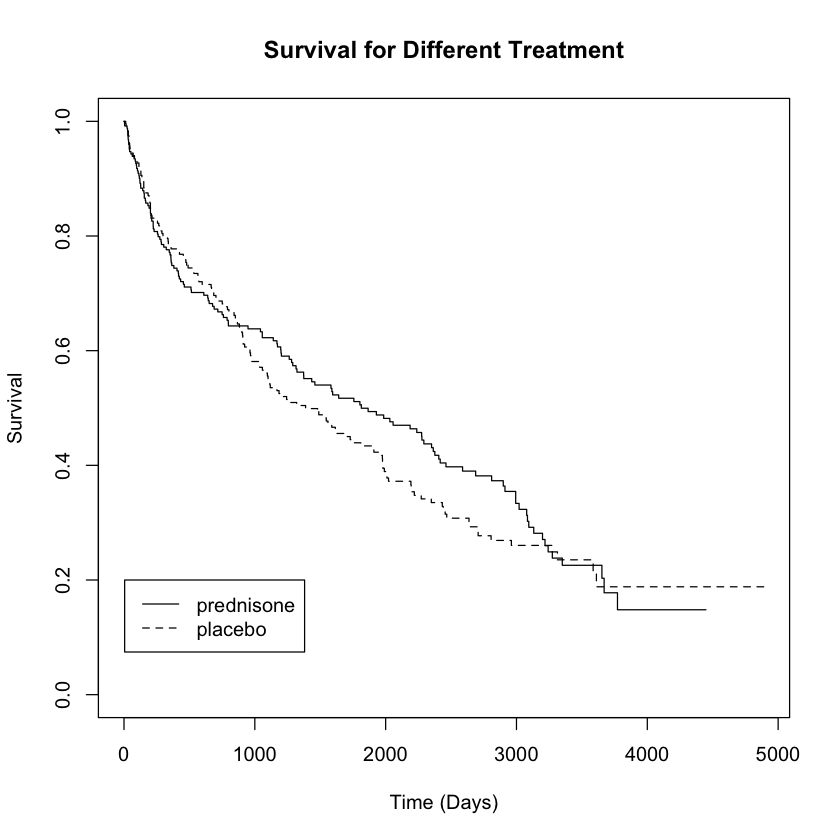

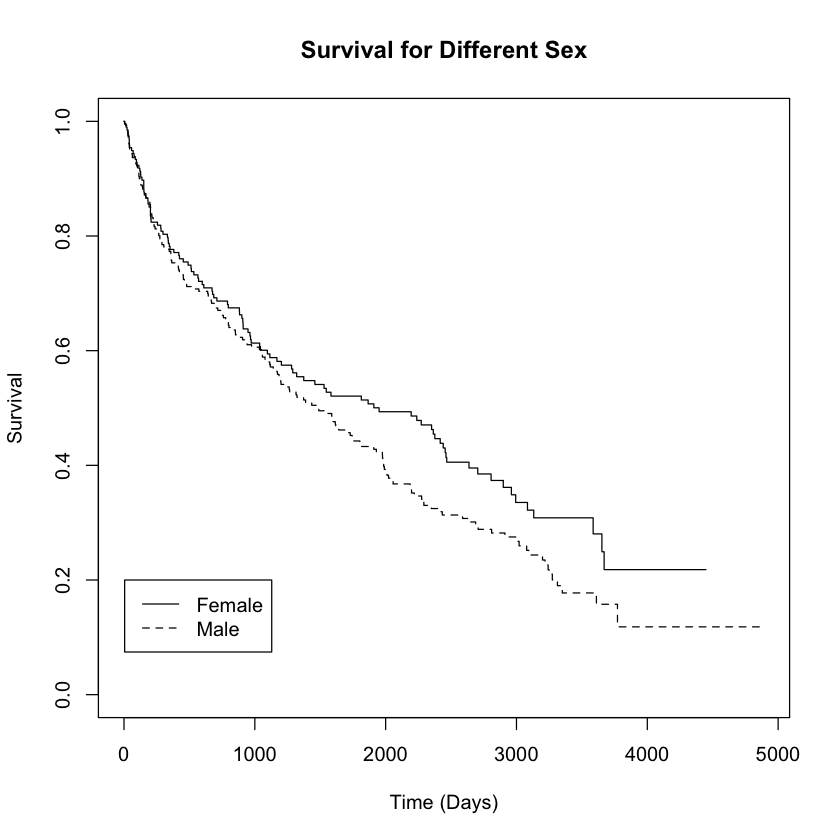

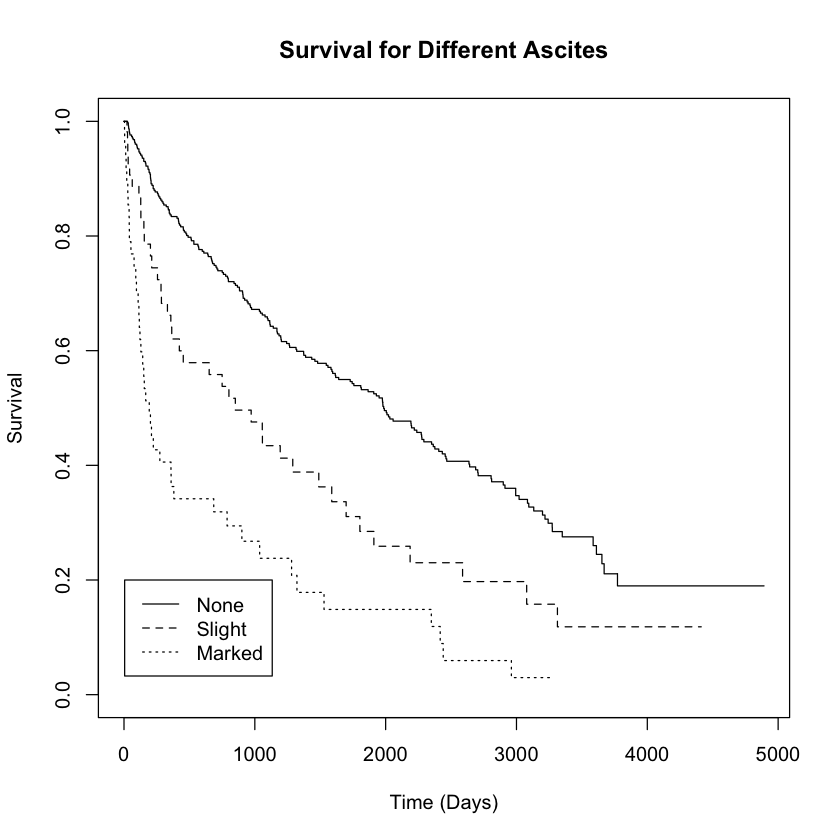

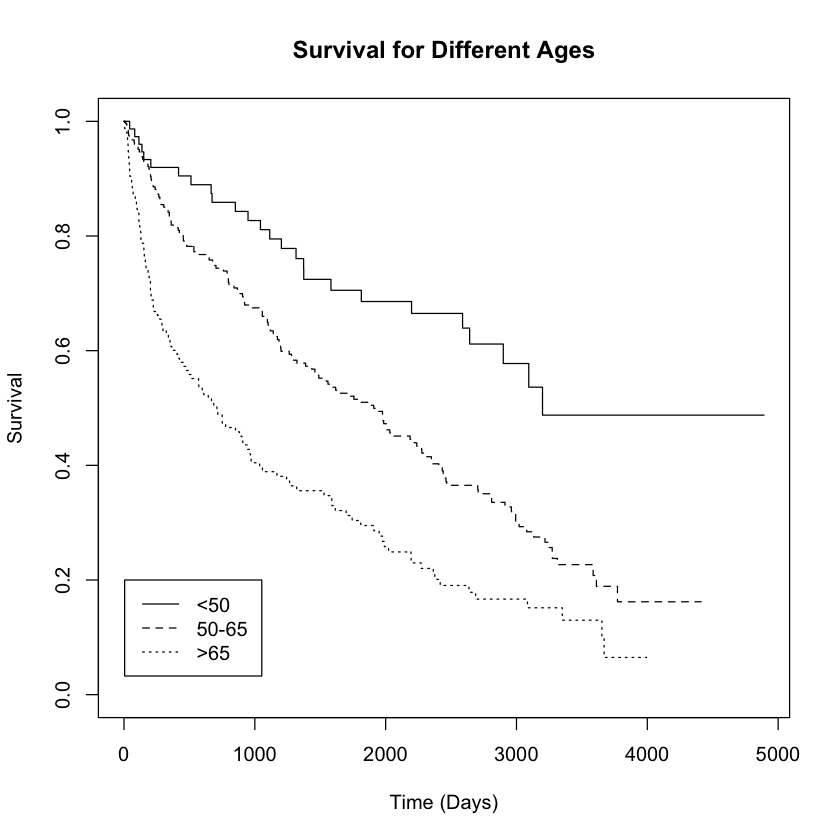

In [34]:
#import data
cirrhosis = read.table("https://www.uio.no/studier/emner/matnat/math/STK4900/data/cirrhosis.txt", header = TRUE)
library(survival)
#fit survival functions
surv_treat = survfit(Surv(time,status)~treat, data = cirrhosis, conf.type = "none")
surv_sex = survfit(Surv(time,status)~sex, data = cirrhosis, conf.type = "none")
surv_asc = survfit(Surv(time,status)~asc, data = cirrhosis, conf.type = "none")
surv_agegr = survfit(Surv(time,status)~agegr, data = cirrhosis, conf.type = "none")
#plot treatment
plot(surv_treat,lty=1:2,xlab="Time (Days)",ylab="Survival",main="Survival for Different Treatment")
legend(5,0.2,c("prednisone","placebo"),lty=1:2)
#plot sex
plot(surv_sex,lty=1:2,xlab="Time (Days)",ylab="Survival",main="Survival for Different Sex")
legend(5,0.2,c("Female","Male"),lty=1:2)
#plot ascites
plot(surv_asc,lty=1:3,xlab="Time (Days)",ylab="Survival",main="Survival for Different Ascites")
legend(5,0.2,c("None","Slight","Marked"),lty=1:3)
#plot age group
plot(surv_agegr,lty=1:3,xlab="Time (Days)",ylab="Survival",main="Survival for Different Ages")
legend(5,0.2,c("<50","50-65",">65"),lty=1:3)

The above Kaplan-Meier plots show surivival as a function of time for the different covariates. The top plot explores the effect of Placebo vs Prednisone treatment. We see that the survival for the placebo begins above the survival for prednisone, then dips bellow it, then rises above it again. In this case the result are too close to make a conclusion. In the sex plot we see that in general, males had a lower survival than women but this can be attributed to many other factors such as habits and occupational hazards, not just cirrhosis. The Ascites plot gives a clear indication that the more fluid build up a patient has, the lower their survival is. The age plot shows a similar, clear trend as each older age group has a lower survival than the previous one.
##### Part B
We will now investigate the significance of each covariate using the log rank test. Here, we are testing the null hypothesis that the two groups have the same survival function. We compute the test statistic $\chi_i^2 = \frac{(O_i-E_i)^2}{se(O_i-E_i)^2}$ and obtain the corresponding P-values.

In [36]:
survdiff(Surv(time,status)~treat, data = cirrhosis)
cat("---------------------------------------------------------\n")
survdiff(Surv(time,status)~sex, data = cirrhosis)
cat("---------------------------------------------------------\n")
survdiff(Surv(time,status)~asc, data = cirrhosis)
cat("---------------------------------------------------------\n")
survdiff(Surv(time,status)~agegr, data = cirrhosis)
cat("---------------------------------------------------------\n")

Call:
survdiff(formula = Surv(time, status) ~ treat, data = cirrhosis)

          N Observed Expected (O-E)^2/E (O-E)^2/V
treat=0 251      142      149     0.355     0.728
treat=1 237      150      143     0.371     0.728

 Chisq= 0.7  on 1 degrees of freedom, p= 0.4 

---------------------------------------------------------


Call:
survdiff(formula = Surv(time, status) ~ sex, data = cirrhosis)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=0 198      111      127      2.00      3.55
sex=1 290      181      165      1.54      3.55

 Chisq= 3.5  on 1 degrees of freedom, p= 0.06 

---------------------------------------------------------


Call:
survdiff(formula = Surv(time, status) ~ asc, data = cirrhosis)

        N Observed Expected (O-E)^2/E (O-E)^2/V
asc=0 386      211    251.9      6.63     48.66
asc=1  54       39     26.2      6.30      6.94
asc=2  48       42     14.0     56.17     59.60

 Chisq= 69.9  on 2 degrees of freedom, p= 7e-16 

---------------------------------------------------------


Call:
survdiff(formula = Surv(time, status) ~ agegr, data = cirrhosis)

          N Observed Expected (O-E)^2/E (O-E)^2/V
agegr=1  80       26     58.7     18.18     22.87
agegr=2 250      148    162.0      1.21      2.72
agegr=3 158      118     71.3     30.51     40.87

 Chisq= 50.6  on 2 degrees of freedom, p= 1e-11 

---------------------------------------------------------


Our tests show that both sex and treatment have high P-values and therefore we cannot conclude that different sex or treatment groups have a different survival than the other groups. We should note that the Kaplan-Meier plot appeared to show a clear trend of lower survival for males which is contradicted here. In contrast, we get small P-values for Ascite and age group so we can conclude that there is a statistically signifiant difference in the survivial for each of the members of the groups. This agrees with what we visually observed in the Kaplan-Meier plots.
##### Part C
We now want to perform a Cox regression to measure the effects of all the covariates simultaineously. this is done by estimating the Hazard function
$$h(t|x_1,..., x_p) = h_0(t)exp(\beta_1x_1 + ... + \beta_px_p)$$
where $h_0(t)$ the Hazard function when all covariates are equal to zero. Below we will do Cox regression with treatment, sex, and ascite as categorical variables and age as a numerical variable.

In [38]:
cirrhosis.all=coxph(Surv(time,status==1)~factor(sex)+factor(treat)+factor(asc)+age ,data=cirrhosis)
cat("---------------------------------------------------------\n")
summary(cirrhosis.all)
cat("---------------------------------------------------------\n")

---------------------------------------------------------


Call:
coxph(formula = Surv(time, status == 1) ~ factor(sex) + factor(treat) + 
    factor(asc) + age, data = cirrhosis)

  n= 488, number of events= 292 

                   coef exp(coef) se(coef)     z Pr(>|z|)    
factor(sex)1   0.461877  1.587050 0.125631 3.676 0.000236 ***
factor(treat)1 0.044818  1.045837 0.117657 0.381 0.703263    
factor(asc)1   0.603507  1.828520 0.175019 3.448 0.000564 ***
factor(asc)2   1.187254  3.278068 0.175224 6.776 1.24e-11 ***
age            0.048877  1.050091 0.006844 7.141 9.26e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(sex)1       1.587     0.6301    1.2407     2.030
factor(treat)1     1.046     0.9562    0.8305     1.317
factor(asc)1       1.829     0.5469    1.2975     2.577
factor(asc)2       3.278     0.3051    2.3252     4.621
age                1.050     0.9523    1.0361     1.064

Concordance= 0.682  (se = 0.017 )
Likelihood ratio test= 109.3  on 5

---------------------------------------------------------


Our results give us small P-values for age, ascite levels, and sex indicating they are all statistically significant covariates. Again, treatment is not a significant covariate. It should be noted that sex was not significant for the log rank test but is for the Cox regression. We can obtain a confidence interval for the Hazard Ratio of sex by the following
$$HR = \frac{h(t|x_{sex}=1,..., x_p)}{h(t|x_{sex}=0,..., x_p)} = exp(\beta_{sex}) = 1.59$$

Thus Hazard increases by $59%$ for male subjects. The R output above also tells us that the $95%$ confidence interval for the sex Hazard Ratio, $exp(\beta_{sex})$ is $CI = (1.24, 2.03)$. Considering that the treatment type was not statistically significant for the Cox regression, the log rank test, and the Kaplan-Meier plot did not show a clear difference in survival, we assert that taking a placebo versus taking prednisone has no significant effect on the survival or hazard of patients.